In [ ]:
# Import libraries
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications.inception_v3 import InceptionV3
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Defining image size and training and validation data path
IMAGE_SIZE = [224, 224]

train_data_path = '/content/drive/MyDrive/final_dataset/train'
validation_data_path = '/content/drive/MyDrive/final_dataset/valid'

In [ ]:
# Performing data augmentation on training data
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

training_data = training_datagen.flow_from_directory(train_data_path,
                                      target_size=(224, 224), 
                                      batch_size=16,
                                      class_mode='categorical') 

Found 43273 images belonging to 25 classes.


In [ ]:
# Performing data augmentation on validation data
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(224,224),
                                  batch_size=16,
                                  class_mode='categorical')

Found 6145 images belonging to 25 classes.


In [ ]:
training_data.class_indices

{'apple': 0,
 'banana': 1,
 'buildings': 2,
 'cat': 3,
 'cow': 4,
 'daisy': 5,
 'dandelion': 6,
 'dog': 7,
 'elephant': 8,
 'forest': 9,
 'glacier': 10,
 'guava': 11,
 'horse': 12,
 'kiwi': 13,
 'mango': 14,
 'mountain': 15,
 'muskmelon': 16,
 'orange': 17,
 'pitaya': 18,
 'rose': 19,
 'sea': 20,
 'squirrel': 21,
 'street': 22,
 'sunflower': 23,
 'tulip': 24}

In [ ]:
# save best model using vall accuracy
model_path = '/content/drive/MyDrive/model_inception_v3.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
# Loading pretrained model
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
# freezing base model weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# getting number of output classes
folders = glob('/content/drive/MyDrive/final_dataset/train/*')

In [ ]:
# our layers
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# train model
history = model.fit(training_data,
                    epochs=25,
                    verbose=1,
                    validation_data= valid_data,
                    callbacks=callbacks_list)

Epoch 1/25
2705/2705 [==============================] - 18066s 7s/step - loss: 7.0282 - accuracy: 0.7383 - val_loss: 4.4838 - val_accuracy: 0.8915

Epoch 00001: val_accuracy improved from -inf to 0.89146, saving model to /content/drive/MyDrive/model_inception_v3.h5
Epoch 2/25
2705/2705 [==============================] - 656s 242ms/step - loss: 6.5213 - accuracy: 0.8535 - val_loss: 5.4458 - val_accuracy: 0.8845

Epoch 00002: val_accuracy did not improve from 0.89146
Epoch 3/25
2705/2705 [==============================] - 650s 240ms/step - loss: 6.5703 - accuracy: 0.8722 - val_loss: 3.0800 - val_accuracy: 0.9352

Epoch 00003: val_accuracy improved from 0.89146 to 0.93523, saving model to /content/drive/MyDrive/model_inception_v3.h5
Epoch 4/25
2705/2705 [==============================] - 657s 243ms/step - loss: 6.7337 - accuracy: 0.8808 - val_loss: 4.1288 - val_accuracy: 0.9235

Epoch 00004: val_accuracy did not improve from 0.93523
Epoch 5/25
2705/2705 [==============================] - 

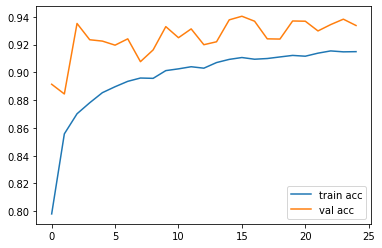

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')